# Figure 2 / Figure 3 - Comparison between estimated standard error using vanilla formula and one-way bootstrap procedure

In [1]:
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
from oce_ecomm_abv_calculation.plots.vanilla_vs_bootstrap_se import (
    get_plot_statistics_from_experiment_results_file,
    get_plot_parameters,
    plot_one_bootstrap_versus_vanilla_se_plot, 
    plot_one_bootstrap_vanilla_se_ratio_plot
)

# Load the plot statistics files

The plot statistics files are either provided (for the proprietary ASOS dataset) or compiled from the consolidated experiment output files (for the UCI and Olist datasets).

In [2]:
plot_statistics_asos_abv_df = (
    pd.read_parquet("./data/plotdata_svbse_asos-customer-order-view_r-BasketValue.parquet")
)
plot_statistics_asos_abs_df = (
    pd.read_parquet("./data/plotdata_svbse_asos-customer-order-view_r-BasketSize.parquet")
)
plot_statistics_asos_asp_df = (
    pd.read_parquet("./data/plotdata_svbse_asos-customer-order-item-view_r-SellingPrice.parquet")
)

plot_statistics_olist_abv_df = (
    get_plot_statistics_from_experiment_results_file(
        vanilla_experiment_results_df=pd.read_parquet(
            "./data/expt_vanilla_olist-brazilian-ecommerce-customer-order-view_"
            "r-BasketValue_consolidated.parquet"),
        bootstrap_experiment_results_df=pd.read_parquet(
            "./data/expt_oneway_olist-brazilian-ecommerce-customer-order-view_"
            "r-BasketValue_consolidated.parquet"),
        normalize_se = True
    )
)

plot_statistics_olist_abs_df = (
    get_plot_statistics_from_experiment_results_file(
        vanilla_experiment_results_df=pd.read_parquet(
            "./data/expt_vanilla_olist-brazilian-ecommerce-customer-order-view_"
            "r-BasketSize_consolidated.parquet"),
        bootstrap_experiment_results_df=pd.read_parquet(
            "./data/expt_oneway_olist-brazilian-ecommerce-customer-order-view_"
            "r-BasketSize_consolidated.parquet"),
        normalize_se = True
    )
)

plot_statistics_olist_asp_df = (
    get_plot_statistics_from_experiment_results_file(
        vanilla_experiment_results_df=pd.read_parquet(
            "./data/expt_vanilla_olist-brazilian-ecommerce-customer-order-item-view_"
            "r-SellingPrice_consolidated.parquet"),
        bootstrap_experiment_results_df=pd.read_parquet(
            "./data/expt_oneway_olist-brazilian-ecommerce-customer-order-item-view_"
            "r-SellingPrice_consolidated.parquet"),
        normalize_se = True
    )
)

plot_statistics_uci_abv_df = (
    get_plot_statistics_from_experiment_results_file(
        vanilla_experiment_results_df=pd.read_parquet(
            "./data/expt_vanilla_uci-online-retail-ii-customer-order-view_"
            "r-BasketValue_consolidated.parquet"),
        bootstrap_experiment_results_df=pd.read_parquet(
            "./data/expt_oneway_uci-online-retail-ii-customer-order-view_"
            "r-BasketValue_consolidated.parquet"),
        normalize_se = True
    )
)

plot_statistics_uci_abs_df = (
    get_plot_statistics_from_experiment_results_file(
        vanilla_experiment_results_df=pd.read_parquet(
            "./data/expt_vanilla_uci-online-retail-ii-customer-order-view_"
            "r-BasketSize_consolidated.parquet"),
        bootstrap_experiment_results_df=pd.read_parquet(
            "./data/expt_oneway_uci-online-retail-ii-customer-order-view_"
            "r-BasketSize_consolidated.parquet"),
        normalize_se = True
    )
)

plot_statistics_uci_asp_df = (
    get_plot_statistics_from_experiment_results_file(
        vanilla_experiment_results_df=pd.read_parquet(
            "./data/expt_vanilla_uci-online-retail-ii-customer-order-item-view_"
            "r-SellingPrice_consolidated.parquet"),
        bootstrap_experiment_results_df=pd.read_parquet(
            "./data/expt_oneway_uci-online-retail-ii-customer-order-item-view_"
            "r-SellingPrice_consolidated.parquet"),
        normalize_se = True
    )
)

plot_statistics_dfs_all = [
    plot_statistics_asos_abv_df,
    plot_statistics_asos_abs_df,
    plot_statistics_asos_asp_df,
    plot_statistics_uci_abv_df,
    plot_statistics_uci_abs_df,
    plot_statistics_uci_asp_df,
    plot_statistics_olist_abv_df,
    plot_statistics_olist_abs_df,
    plot_statistics_olist_asp_df,
]

# Oneway bootstrap / Vanilla SE ratio plot

Figure 2 in the paper - The ratio between the one-way bootstrap standard error (SE) estimates and the vanilla sample SE estimates for (Left) ABV, (Middle) ABS, and (Right) ASP. The error bars represent the 95% confidence interval for the SE estimates.

/var/folders/bf/0lrr9t1d68j2gkrzm2fgq47r0000gq/T/ipykernel_81704/1848996833.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


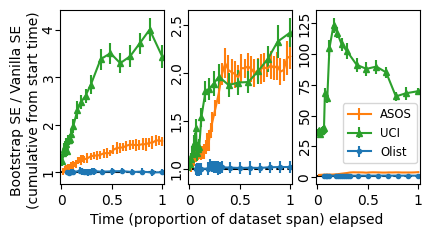

In [3]:
fig, (ax_abv, ax_abs, ax_asp) = (
    plt.subplots(
        1, 3, sharex=True, figsize=(4.2, 2.2))
)

ax_abv = plot_one_bootstrap_vanilla_se_ratio_plot(
    ax=ax_abv,
    xaxis_scale_reference="prop_time_elapsed",
    plot_statistics_dfs=[
        plot_statistics_asos_abv_df,
        plot_statistics_uci_abv_df,
        plot_statistics_olist_abv_df
    ]
)
ax_abs = plot_one_bootstrap_vanilla_se_ratio_plot(
    ax=ax_abs,
    xaxis_scale_reference="prop_time_elapsed",
    plot_statistics_dfs=[
        plot_statistics_asos_abs_df,
        plot_statistics_uci_abs_df,
        plot_statistics_olist_abs_df
    ]
)
ax_asp = plot_one_bootstrap_vanilla_se_ratio_plot(
    ax=ax_asp,
    xaxis_scale_reference="prop_time_elapsed",
    plot_statistics_dfs=[
        plot_statistics_asos_asp_df,
        plot_statistics_uci_asp_df,
        plot_statistics_olist_asp_df
    ]
)

for ax in [ax_abv, ax_abs, ax_asp]:
    ax.set_yticks(ax.get_yticks()[1:-1], ax.get_yticklabels()[1:-1], 
                  rotation=90, va='center', fontsize="medium")
    ax.tick_params(axis="y", rotation=90, pad=0)
    
ax_asp.legend(
          bbox_to_anchor=(0.2, 0.085),
          fontsize='small',
          ncols=1,
          columnspacing=0.9)
fig.supylabel("Bootstrap SE / Vanilla SE\n(cumulative from start time)",
              fontsize="medium",
              ma="center",
              x=0.01, y=0.53)
fig.supxlabel("Time (proportion of dataset span) elapsed",
              fontsize="medium",
              x=0.55, y=0)
fig.tight_layout(pad=0.2)

fig.savefig("./data/plot_svbse_ratio_all.pdf", bbox_inches="tight")
fig.show()

One bootstrap SE / vanilla SE ratio plot for ABV under a single (ASOS) dataset:

/var/folders/bf/0lrr9t1d68j2gkrzm2fgq47r0000gq/T/ipykernel_81704/2051655891.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


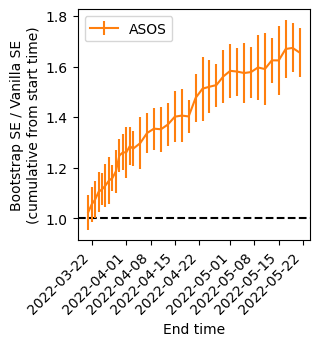

In [4]:
fig, ax = plt.subplots(figsize=(3, 3))

ax = plot_one_bootstrap_vanilla_se_ratio_plot(
    ax=ax,
    xaxis_scale_reference="end_time",
    plot_statistics_dfs=[
        plot_statistics_asos_abv_df,
    ]
)

ax.legend(loc="upper left")
ax.set_ylabel("Bootstrap SE / Vanilla SE\n(cumulative from start time)")
ax.set_xlabel("End time")

fig.show()

One bootstrap SE / vanilla SE ratio plot for ABV under multiple (ASOS, UCI, Olist) datasets:

/var/folders/bf/0lrr9t1d68j2gkrzm2fgq47r0000gq/T/ipykernel_81704/1684093377.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


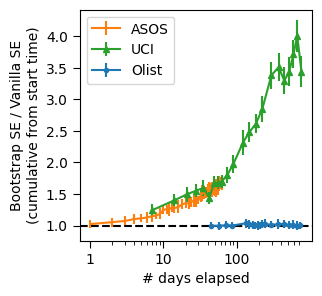

In [5]:
fig, ax = plt.subplots(figsize=(3, 3))

ax = plot_one_bootstrap_vanilla_se_ratio_plot(
    ax=ax,
    xaxis_scale_reference="days_elapsed",
    plot_statistics_dfs=[
        plot_statistics_asos_abv_df,
        plot_statistics_uci_abv_df,
        plot_statistics_olist_abv_df
    ]
)

ax.legend()
ax.set_ylabel("Bootstrap SE / Vanilla SE\n(cumulative from start time)")
ax.set_xlabel("# days elapsed")

fig.show()

# Oneway bootstrap vs Vanilla SE Plot

One bootstrap SE vs vanilla SE plot (with values normalized) for ABV for single (ASOS) dataset:

/var/folders/bf/0lrr9t1d68j2gkrzm2fgq47r0000gq/T/ipykernel_81704/1887213188.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


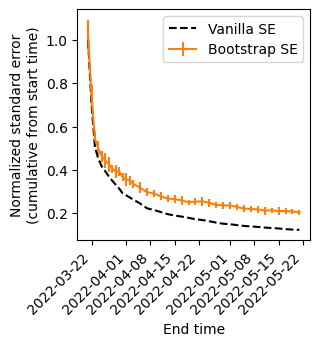

In [6]:
fig, ax = plt.subplots(figsize=(3, 3))

ax = plot_one_bootstrap_versus_vanilla_se_plot(
    ax=ax,
    xaxis_scale_reference="end_time",
    plot_statistics_df=plot_statistics_asos_abv_df,
)

ax.legend()
ax.set_ylabel("Normalized standard error\n(cumulative from start time)")
ax.set_xlabel("End time")

fig.show()

Figure 3 - Trajectories of the one-way bootstrap standard error (SE) estimates (solid colored lines) and the vanilla SE estimates (dashed black lines) under different dataset-metric combinations. Estimates are cumulative from day one of the datasets. All x- and y-axes are on different scales.

/var/folders/bf/0lrr9t1d68j2gkrzm2fgq47r0000gq/T/ipykernel_81704/133787226.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


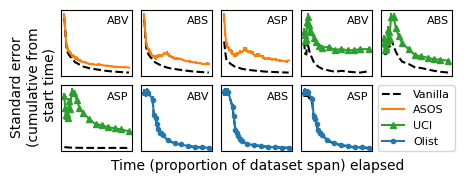

In [7]:
num_rows = 2
num_cols = 5

fig, axs = plt.subplots(num_rows, num_cols, figsize=(4.5, 1.6))

response_to_metric_mapping = {
    "r_BasketValue": "ABV",
    "r_BasketSize": "ABS",
    "r_SellingPrice": "ASP"
}

for index in range(0, num_rows * num_cols):
    if index >= len(plot_statistics_dfs_all):
        continue
        
    ax = axs[index // num_cols, index % num_cols]
    plot_statistics_df = plot_statistics_dfs_all[index]
    ax = (
        plot_one_bootstrap_versus_vanilla_se_plot(
            ax=ax,
            xaxis_scale_reference="end_time",
            plot_statistics_df=plot_statistics_df,
        )
    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.65, 0.78, response_to_metric_mapping[plot_statistics_df["response_col"].iloc[0]], 
            transform=ax.transAxes,
            fontsize=8)
    
# Use the last space for plot legend
last_ax = axs[num_rows - 1, num_cols - 1]
last_ax.axis("off")
last_ax.legend(
    handles=[
        mlines.Line2D([], [], ls='--', c='k', label="Vanilla"),
        mlines.Line2D([], [], **get_plot_parameters(plot_statistics_asos_abv_df)),
        mlines.Line2D([], [], **get_plot_parameters(plot_statistics_uci_abv_df)),
        mlines.Line2D([], [], **get_plot_parameters(plot_statistics_olist_abv_df))
    ],
    loc="center",
    fontsize=8,
    columnspacing=0
) 


fig.supylabel("Standard error\n(cumulative from\n start time)",
              fontsize="medium",
              ma="center",
              x=0.0, y=0.52)
fig.supxlabel("Time (proportion of dataset span) elapsed",
              fontsize="medium",
              x=0.55, y=-0.02)
fig.tight_layout(pad=0)

fig.savefig("./data/plot_svbse_trajectory_small.pdf", bbox_inches="tight")
fig.show()